## import library yang digunakan

In [1]:
from sklearn.cluster import KMeans
from openpyxl import load_workbook
import pandas as pd
import matplotlib.pyplot as plt

## baca data excel

In [2]:
wb = load_workbook("D:\Studied_at_UNP\SEMESTER-5\praktikum_data_mining\praktikum_5\Data Alumni.xlsx")
sheet_ranges = wb['Sheet1']
df = pd.DataFrame(sheet_ranges.values)



<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\asus\AppData\Local\Temp\ipykernel_23828\2553945146.py:1: SyntaxWarning: invalid escape sequence '\S'
  wb = load_workbook("D:\Studied_at_UNP\SEMESTER-5\praktikum_data_mining\praktikum_5\Data Alumni.xlsx")


## seleksi kolom dari dataframe

In [3]:
d = df[1:9][[1, 2, 3, 4, 5, 6, 7, 8]]
d.columns = ['NIM', 'TTL', 'IPK', 'Masa Tunggu', 'Tahun Masuk', 'Tahun Lulus', 'Gaji', 'TOEFL']
d



,NIM,TTL,IPK,Masa Tunggu,Tahun Masuk,Tahun Lulus,Gaji,TOEFL
1,9018263,"Tapuih, 4 November 1989",2.13,2.4,2009,2016,2000000,390
2,9018269,"Koto Anau, 19 Desember 1990",2.75,2.4,2009,2016,2000000,413
3,9020026,"Lampung, 27 Maret 1992",3.24,2.4,2009,2016,2000000,400
4,12018060,"Padang, 23 Maret 1994",3.37,2.4,2012,2016,2000000,396
5,11018022,"Jakarta, 22 Juni 1993",3.2,2.4,2011,2016,2000000,460
6,9018212,"Pekanbaru, 3 Juni 1991",3.24,0,2009,2016,1200000,403
7,9018301,"Purbalingga, 08 Oktober 1991",3.06,2.4,2009,2016,2000000,450
8,12022020,"Bukittinggi, 29 Maret 1992",3.47,2.4,2012,2016,1500000,423


## checking datatipe pada kolom

In [11]:
df.dtypes

0
No              object
NIM             object
TTL             object
IPK            float64
Masa Tunggu     object
Tahun Masuk     object
Tahun Lulus     object
Gaji           float64
TOEFL           object
Masa Studi      object
Umur            object
Tahun Lahir     object
MasaStudi      float64
dtype: object

## formating data

In [5]:
from datetime import datetime
now = datetime.now()

df.columns = df.iloc[0]
df = df.drop(0)

now.year
for index, row in df.iterrows():
    df.loc[index, 'Tahun Lahir'] = row['TTL'][-4:]
for index, row in df.iterrows():
    df.loc[index, 'Umur'] = now.year - int(row['Tahun Lahir'])
for index, row in df.iterrows():
    df.loc[index, 'MasaStudi'] = row['Tahun Lulus'] - row['Tahun Masuk']
df['IPK'] = df['IPK'].apply(str)
df['IPK'] = df['IPK'].str.replace(',', '.').apply(float)
df['Gaji'] = df['Gaji'].apply(float)
df

,No,NIM,TTL,IPK,Masa Tunggu,Tahun Masuk,Tahun Lulus,Gaji,TOEFL,Masa Studi,Umur,Tahun Lahir,MasaStudi
1,1,9018263,"Tapuih, 4 November 1989",2.13,2.4,2009,2016,2000000.0,390,7,36,1989,7.0
2,2,9018269,"Koto Anau, 19 Desember 1990",2.75,2.4,2009,2016,2000000.0,413,7,35,1990,7.0
3,3,9020026,"Lampung, 27 Maret 1992",3.24,2.4,2009,2016,2000000.0,400,7,33,1992,7.0
4,4,12018060,"Padang, 23 Maret 1994",3.37,2.4,2012,2016,2000000.0,396,4,31,1994,4.0
5,5,11018022,"Jakarta, 22 Juni 1993",3.20,2.4,2011,2016,2000000.0,460,5,32,1993,5.0
6,6,9018212,"Pekanbaru, 3 Juni 1991",3.24,0,2009,2016,1200000.0,403,7,34,1991,7.0
7,7,9018301,"Purbalingga, 08 Oktober 1991",3.06,2.4,2009,2016,2000000.0,450,7,34,1991,7.0
8,8,12022020,"Bukittinggi, 29 Maret 1992",3.47,2.4,2012,2016,1500000.0,423,4,33,1992,4.0


## check formatting lagi

In [6]:
print(df.dtypes)

0
No              object
NIM             object
TTL             object
IPK            float64
Masa Tunggu     object
Tahun Masuk     object
Tahun Lulus     object
Gaji           float64
TOEFL           object
Masa Studi      object
Umur            object
Tahun Lahir     object
MasaStudi      float64
dtype: object


## ubah index dataframe

In [7]:
dTable = df[['NIM', 'IPK', 'Umur', 'MasaStudi', 'TOEFL', 'Masa Tunggu']].reset_index(drop=True)
dTable

,NIM,IPK,Umur,MasaStudi,TOEFL,Masa Tunggu
0,9018263,2.13,36,7.0,390,2.4
1,9018269,2.75,35,7.0,413,2.4
2,9020026,3.24,33,7.0,400,2.4
3,12018060,3.37,31,4.0,396,2.4
4,11018022,3.20,32,5.0,460,2.4
5,9018212,3.24,34,7.0,403,0
6,9018301,3.06,34,7.0,450,2.4
7,12022020,3.47,33,4.0,423,2.4


## ambil data IPK dan MasaStudi untuk cluster

In [8]:
x = dTable[['IPK', 'MasaStudi']]
print(x)

0   IPK  MasaStudi
0  2.13        7.0
1  2.75        7.0
2  3.24        7.0
3  3.37        4.0
4  3.20        5.0
5  3.24        7.0
6  3.06        7.0
7  3.47        4.0


## proses clustering

coordinate 0 0
IPK          2.13
MasaStudi    7.00
Name: 0, dtype: float64 Labels 2
coordinate 1 0
IPK          2.75
MasaStudi    7.00
Name: 1, dtype: float64 Labels 0
coordinate 2 0
IPK          3.24
MasaStudi    7.00
Name: 2, dtype: float64 Labels 0
coordinate 3 0
IPK          3.37
MasaStudi    4.00
Name: 3, dtype: float64 Labels 1
coordinate 4 0
IPK          3.2
MasaStudi    5.0
Name: 4, dtype: float64 Labels 1
coordinate 5 0
IPK          3.24
MasaStudi    7.00
Name: 5, dtype: float64 Labels 0
coordinate 6 0
IPK          3.06
MasaStudi    7.00
Name: 6, dtype: float64 Labels 0
coordinate 7 0
IPK          3.47
MasaStudi    4.00
Name: 7, dtype: float64 Labels 1


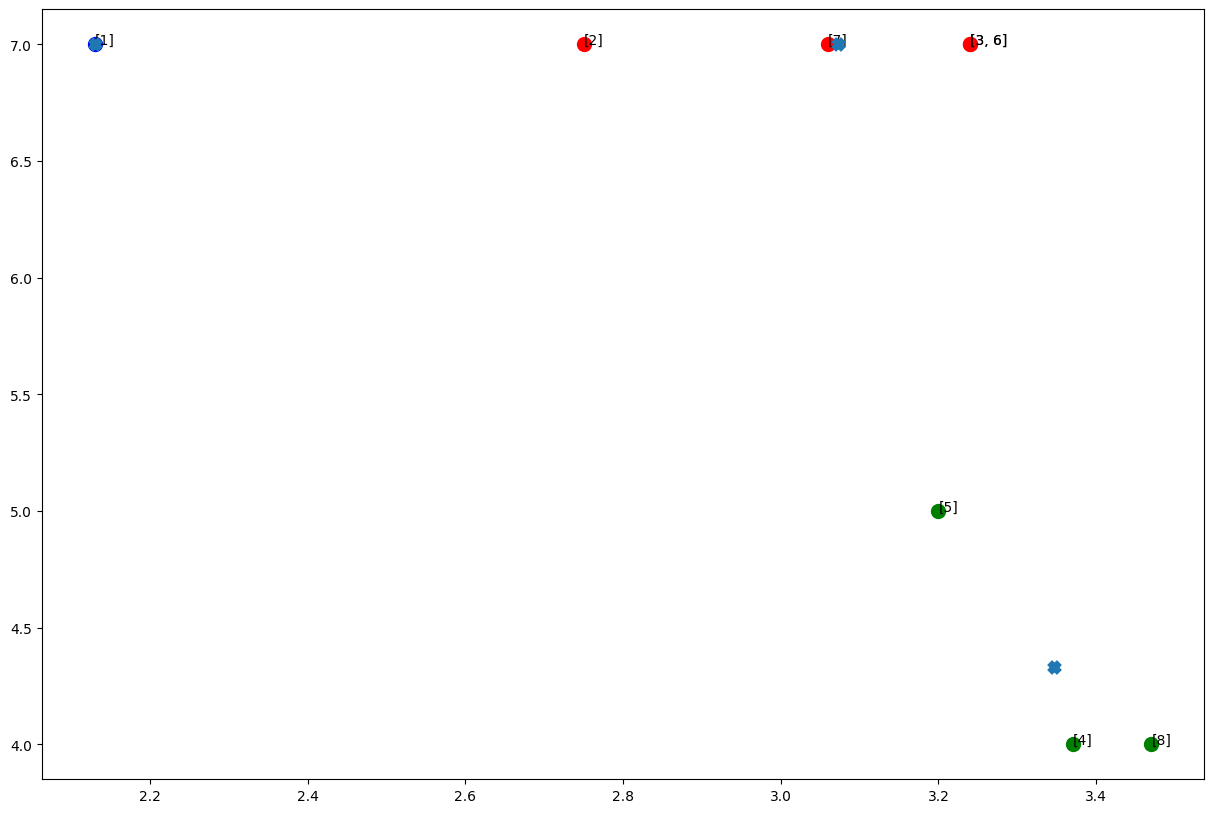

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
centroids = kmeans.cluster_centers_
plt.figure(figsize=(15, 10))
colors = ['ro', 'go', 'bo']
for i in range(len(x)):
    print('coordinate %s'%i, x.iloc[i], 'Labels %s'%kmeans.labels_[i])
    plt.plot(x.iloc[i]['IPK'], x.iloc[i]['MasaStudi'], colors[kmeans.labels_[i]], markersize=10)
    list_cluster = df[(df['IPK'] == x.iloc[i]['IPK']) & (df['MasaStudi'] == x.iloc[i]['MasaStudi'])].index.tolist()
    plt.text(df.iloc[i]['IPK'], df.iloc[i]['MasaStudi'], '%s'%(list_cluster))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, linewidth=5, zorder=10)
plt.show()